In [2]:
import matplotlib.pyplot as plt
from random import choices
from collections import Counter
import numpy as np
from math import factorial
from random import shuffle

plt.style.use('_mpl-gallery')

TRIALS = 50
MAX_LENGTH = 8

def bogosort(data):
    i = 1
    while not all(a <= b for a, b in zip(data, data[1:])):
        shuffle(data)
        i+=1
    return data, i


y = {}

for length in range(2,MAX_LENGTH+1):
    y[str(length)] = []
    for j in range(TRIALS):
        array = []
        for n in range(length):
            array.append(n+1)

        shuffle(array)

        sorted, iters = bogosort(array)
        y[str(length)].append(iters)

x = list(map(lambda x: int(x), y.keys()))

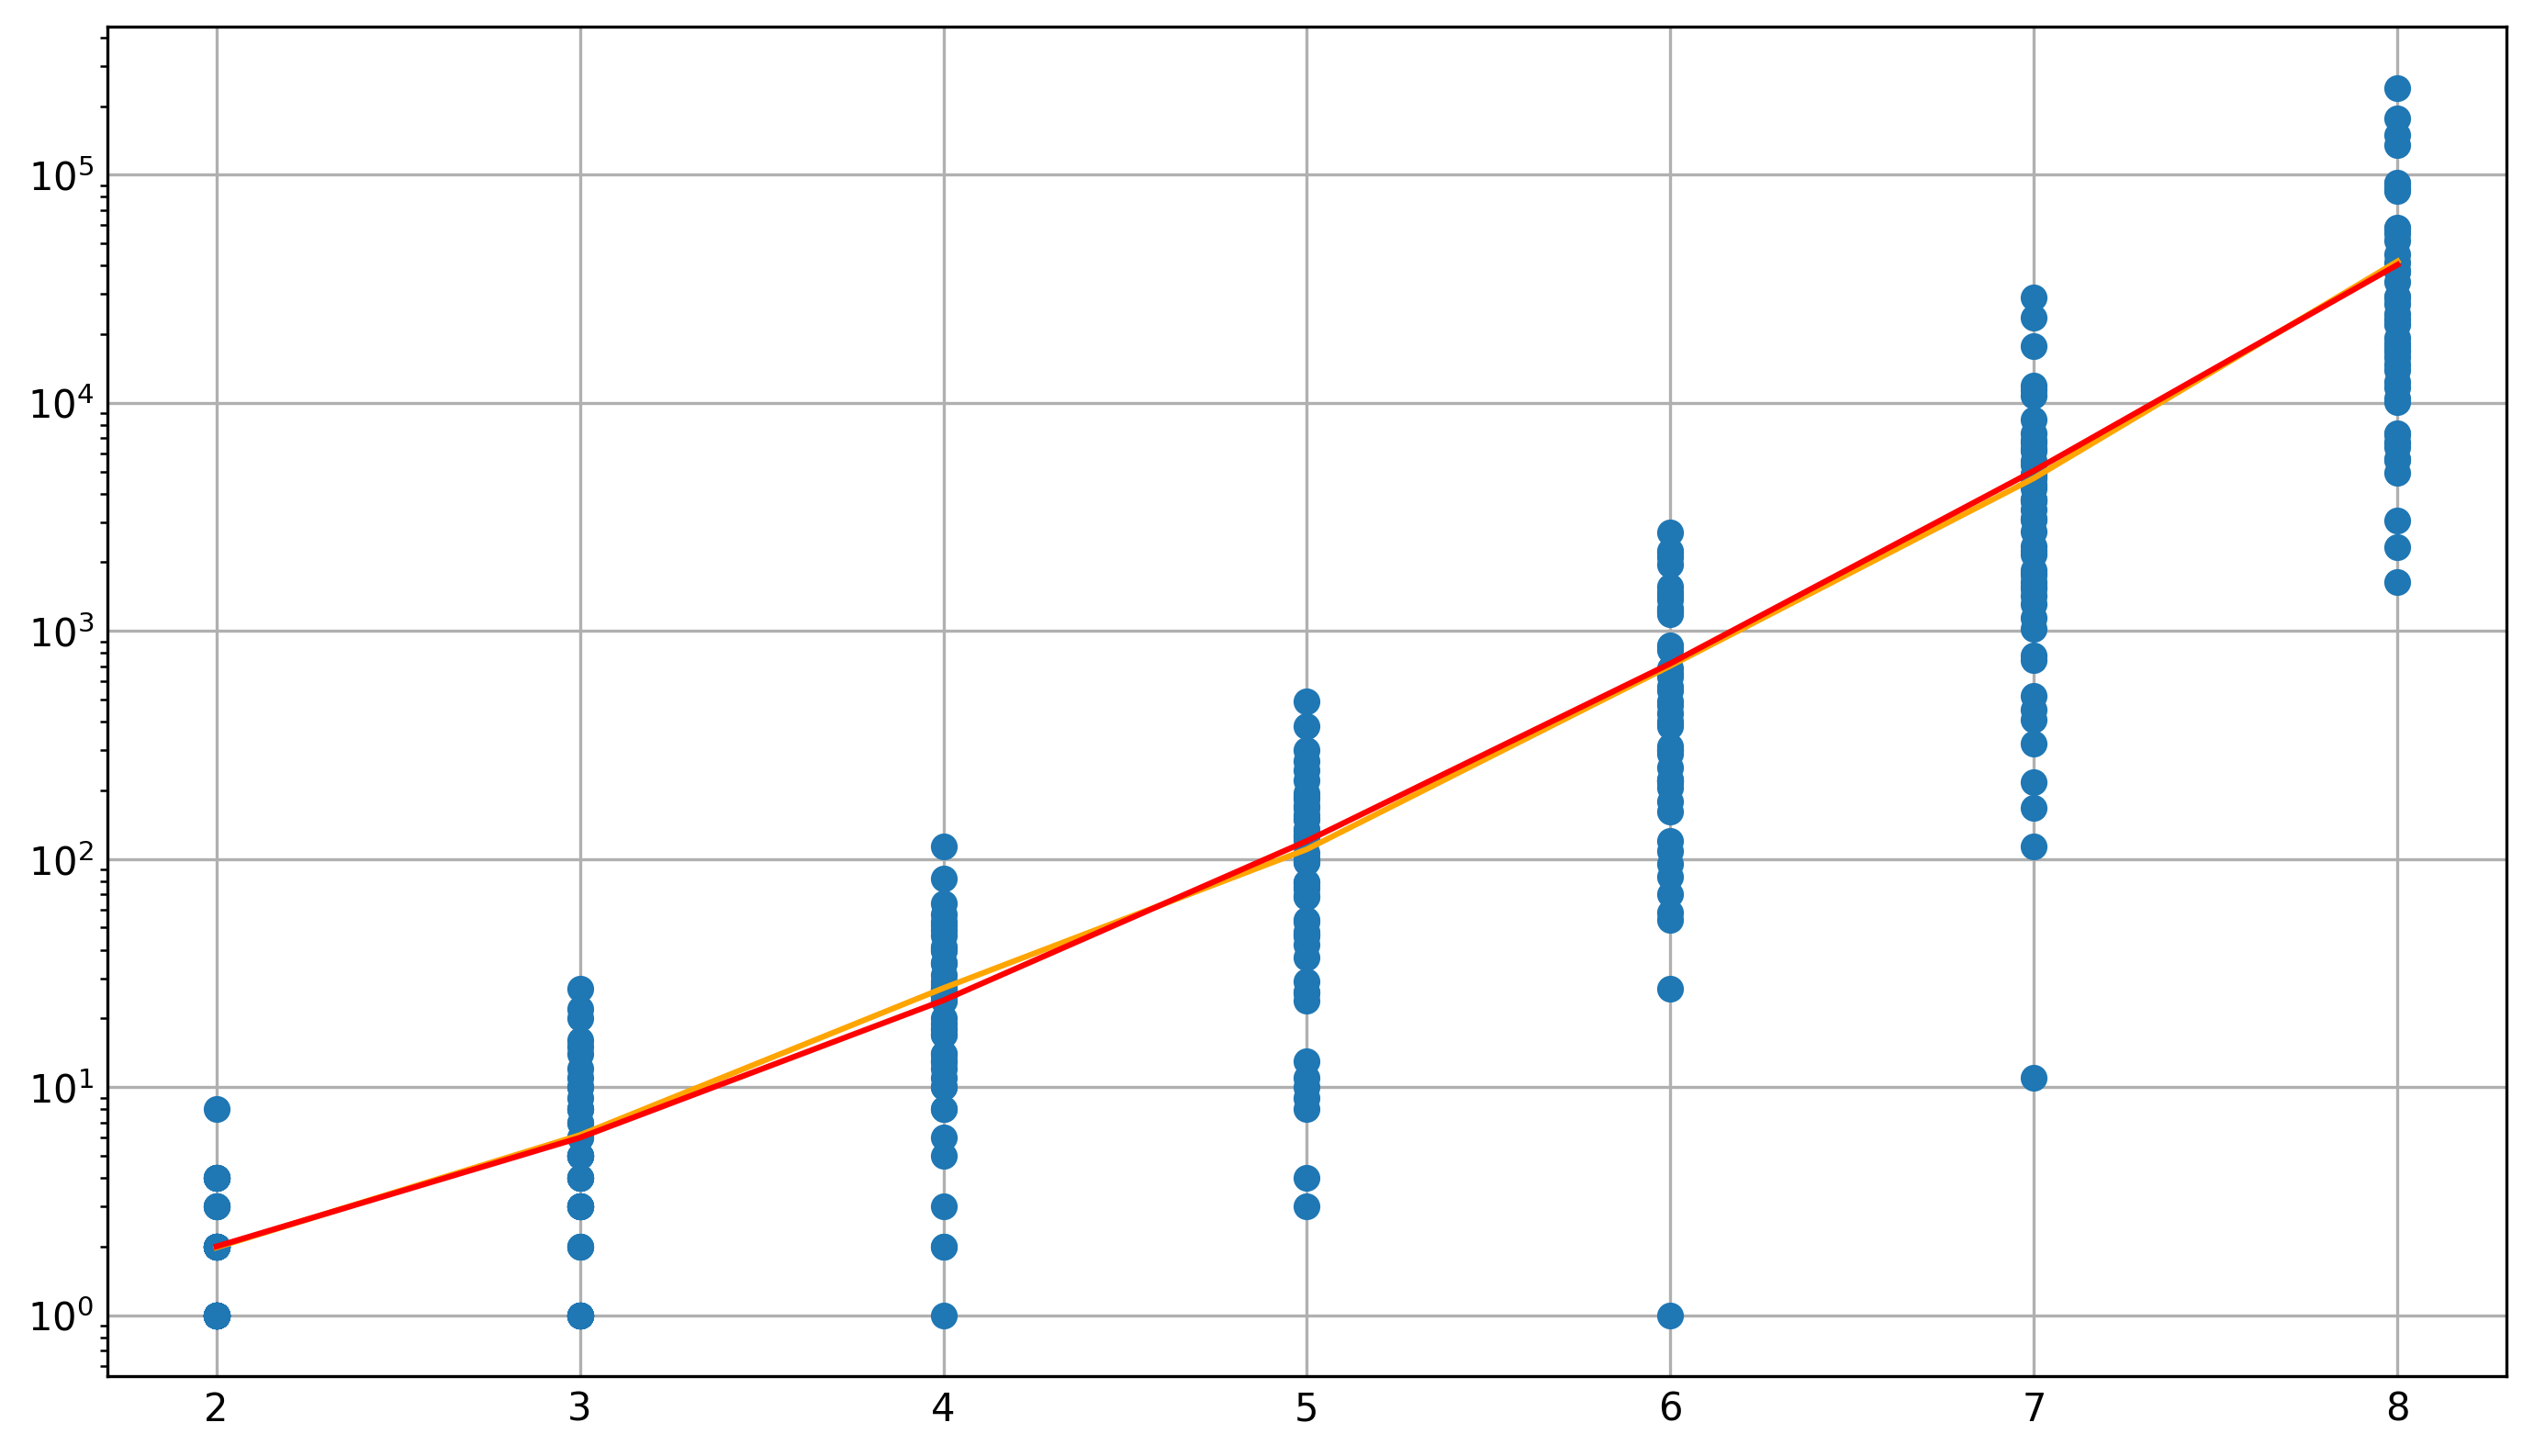

In [3]:
fig, ax = plt.subplots()

ratio = 16/9
size = 5
fig.set_size_inches(size*ratio, size)
fig.set_dpi(300)

point_x = []
point_y = []
point_avg = []
theoretical = []

for i in y:
    sum = 0
    for j in y[i]:
        point_x.append(int(i))
        point_y.append(j)
        sum+=j
    point_avg.append(sum/len(y[i]))
for n in x:
    theoretical.append(factorial(n))

ax.scatter(point_x, point_y)

ax.plot(x, point_avg, color="orange")

ax.plot(x, theoretical, color="red")

plt.semilogy(base=10)

plt.show()